可以在[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325)获取纸制版和电子版的*Think Python 3e*.

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/thinkpython.py');
download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/diagram.py');

import thinkpython

# 变量和语句

在上一章，我们使用运算符书写表达式，执行算术运算。

本章你将学习变量和语句，`import`语句和`print`函数。我也将介绍更多关于编程的术语，包括参数和模块。


## 变量

**变量variable**是指向一个值的名字。要创建变量，可以像这样写**赋值语句**。

In [2]:
n = 17

赋值语句有3部分：变量的名字在左边，等号运算符`=`在中间，表达式在右边。在上面的例子中，表达式是一个整数。在下面的例子中，表达式是一个浮点数。

In [3]:
pi = 3.141592653589793

下面的例子中，表达式是一个字符串。

In [4]:
message = 'And now for something completely different'

当你运行赋值语句，不会有输出。Python创建变量并给它一个值，但赋值语句没有直接可见的效果。

但是，在创建变量之后，你可以把它作为一个表达式。因此我们可以像这样显示`message`的值：

In [5]:
message

'And now for something completely different'

你也可以使用变量作为算术运算表达式的一部分。

In [6]:
n + 25

42

In [7]:
2 * pi

6.283185307179586

你也可以在调用函数时使用变量。

In [8]:
round(pi)

3

In [9]:
len(message)

42

## 状态图

书面表示变量的常见方式是用一个箭头将变量名称指向变量的值。

In [10]:
import math

from diagram import make_binding, Frame

binding = make_binding("message", 'And now for something completely different')
binding2 = make_binding("n", 17)
binding3 = make_binding("pi", 3.141592653589793)

frame = Frame([binding2, binding3, binding])

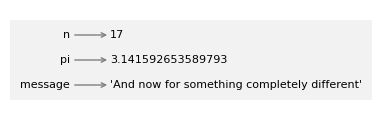

In [11]:
from diagram import diagram, adjust


width, height, x, y = [3.62, 1.01, 0.6, 0.76]
ax = diagram(width, height)
bbox = frame.draw(ax, x, y, dy=-0.25)
# adjust(x, y, bbox)

这种图形称为**状态图state diagram**，显示了每个变量所处的状态。我们将在全书使用状态图，表示Python存储变量和值的模型。

## 变量名

变量名可以想多长有多长。变量名可以包含字母和数字，但不能以数字开始。大写字母是合法的，但习惯上变量只使用小写字母。

变量名中唯一可以使用的半角标点符号是下划线`_`。它通常用于连接多个单词的变量名，例如`your_name`或者`airspeed_of_unladen_swallow`。

如果你提供了非法的变量名，你将得到语法错误。`million!`是非法的，因为它包含标点符号。

In [12]:
%%expect SyntaxError

million! = 1000000

SyntaxError: invalid syntax (4061783710.py, line 1)

`76trombones`是非法的，因为它以数字开始。

In [13]:
%%expect SyntaxError

76trombones = 'big parade'

SyntaxError: invalid decimal literal (3636686625.py, line 1)

`class`也是非法的，但错误原因可能不明显。

In [14]:
%%expect SyntaxError

class = 'Self-Defence Against Fresh Fruit'

SyntaxError: invalid syntax (3285659805.py, line 1)

事实上`class`是一个**关键字keyword**。关键字是python用来指定程序结构的特殊单词。

关键字不能用于变量名。

以下是python的完整关键字列表。

```
False      await      else       import     pass
None       break      except     in         raise
True       class      finally    is         return
and        continue   for        lambda     try
as         def        from       nonlocal   while
assert     del        global     not        with
async      elif       if         or         yield
```

In [15]:
from keyword import kwlist

len(kwlist)

35

你不需要记住这个列表。在大多数IDE中，关键字的颜色是不一样的；如果你想用关键字定义变量名，你会发现的。

## 导入语句

为了使用一些Python功能，你需要**导入import**它们。例如，下面的语句将导入`math`模块。

In [16]:
import math

**模块module**是变量和函数的集合。math模块提供变量`pi`，包含数学常数$\pi$。我们可以像这样展示它的值：

In [17]:
math.pi

3.141592653589793

要在模块中使用变量，你需要在模块名和变量名之间使用**点号运算符dot operator** (`.`)。

math模块也包含函数。例如，`sqrt`计算平方根。

译注：`math.sqrt`函数的定义域为非负数。cmath模块和python标准算术运算符在复数域进行计算。

In [18]:
math.sqrt(25)

5.0

`pow(m, n)`计算m的n次幂。

In [19]:
math.pow(5, 2)

25.0

In [20]:
import cmath
cmath.e**(1j*cmath.pi)+1

1.2246467991473532e-16j

现在我们知道了计算幂数的两种方式：使用`math.pow`函数，或者使用幂运算符`**`。

两种方式都可以，但运算符的使用频率远比对应函数高。

## 表达式和语句

目前我们看到了几种表达式。表达式可以是单个值，例如一个整数，浮点数或者字符串；表达式也可以是一组值和运算符的组合。它还可以包含变量名与函数调用。

以下是一个包含这些元素的表达式。

In [21]:
19 + n + round(math.pi) * 2

42

我们也看到了几种语句。**语句statement**是代码的一个单元，会产生效果，但没有值。例如，赋值语句创建一个变量并给它提供值，但赋值语句本身没有值。

In [22]:
n = 17

与此类似，导入语句会产生效果：导入模块，让我们使用其中的变量和函数，但导入语句没有可见的效果。

In [23]:
import math

计算表达式的值称作**求值evaluation**。运行一个语句称作**执行execution**。

## print函数

当你对表达式求值时，结果会被显示。

In [24]:
n + 1

18

但当你对多个表达式求值时，只有最后一个的值会被显示。

In [24]:
n + 2
n + 3

要显示多个值，你可以使用`print`函数。

In [25]:
print(n+2)
print(n+3)

19
20


该函数对浮点数和字符串也有效。

In [26]:
print('pi的值大约是')
print(math.pi)

pi的值大约是
3.141592653589793


你也可以使用逗号分隔一组表达式。

In [28]:
print('pi的值大约是', math.pi)

pi的值大约是 3.141592653589793


注意`print`函数会在多个值之间添加空格。

## 参数

当你调用函数时，括号中的表达式称为**参数argument**。我们目前看过的有些函数只接受1个参数，例如`int`。

In [29]:
int('101')

101

有些函数接受两个参数，例如`math.pow`。

In [30]:
math.pow(5, 2)

25.0

有些函数接受额外的可选参数。例如，`int`可以接受第2个参数，指定数字的基数。

In [31]:
int('101', 2)

5

基数为2的数字序列`101`对应十进制的数字5。

`round`也接受可选的第2个参数，可以指定近似到小数点后几位。

In [32]:
round(math.pi, 3)

3.142

有些函数可以接受任意数量的参数，例如`print`。

In [33]:
print('Any', 'number', 'of', 'arguments')

Any number of arguments


如果你调用一个函数，提供了过多参数，将产生`TypeError`。

In [34]:
%%expect TypeError

float('123.0', 2)

TypeError: float expected at most 1 argument, got 2

如果你提供的参数太少，也将产生`TypeError`。

In [35]:
%%expect TypeError

math.pow(2)

TypeError: pow expected 2 arguments, got 1

如果函数无法处理你提供的参数的类型，也将产生`TypeError`。

In [36]:
%%expect TypeError

math.sqrt('123')

TypeError: must be real number, not str

在你开始学习的时候这种检查可能很恼人，但它会帮助你检测和纠正错误。

## 注释

当程序变得更大更复杂，它们会变得更难阅读。形式语言很精密，通常看到一段代码很难明白它在干什么以及为什么这样做。

出于这个原因，将注解加入你的程序，用自然语言解释程序在干什么是个好主意。这些注解称为**注释comments**，以`#`符号作为开端。

In [37]:
# 42分42秒对应的秒数
seconds = 42 * 60 + 42

在这个例子里，注释单独处于一行。你也可以将注释放在代码行的末尾：

In [37]:
miles = 10 / 1.61     # 10km对应的英里数

从`#`开始到该行结尾的所有内容都被忽略，它对程序的执行没有影响。

注释在说明代码中不明显的功能时最有用。可以合理地假定阅读者能明白这段代码*是什么*；而解释代码*为什么*这么设计会更有用。

下面的注释是对代码的重复，没有用处：

In [39]:
v = 8     # 将8赋值给v

下面的注释包含了代码中没有的有用信息：

In [40]:
v = 8     # 速度，单位为英里/小时

好的变量名可以减少注释的需求，但过长的变量名将让复杂的表达式难以阅读，所以需要权衡。

## 调试

程序中会出现3种错误：语法错误，运行时错误和语义错误。为了更快地处理它们，有必要分辨它们。

- **语法错误Syntax error**：“语法”指的是代码中的结构和关于结构的规则。如果程序中出现语法错误，Python不会运行程序。它将立刻展示错误信息。
- **运行时错误Runtime error**：如果程序中没有语法错误，就可以运行。但在运行过程中如果有些东西出错，Python将显示错误信息并终止程序。这种类型称为运行时错误。它也叫作**异常exception**，因为有些意料之外的事情发生了。
- **语义错误Semantic error**：“语义”即含义。如果程序中出现语义错误，程序能够运行且不会产生错误信息，但不会按你的意愿执行。识别语义错误可能很棘手，因为需要你回过头去观察程序输出并尝试理解它做了什么。

我们可以看到，一个非法的变量名将导致语法错误。

In [41]:
%%expect SyntaxError

million! = 1000000

SyntaxError: invalid syntax (4061783710.py, line 1)

如果你给运算符提供不支持的类型，将产生运行时错误。

In [42]:
%%expect TypeError

'126' / 3

TypeError: unsupported operand type(s) for /: 'str' and 'int'

最后是一个语义错误的例子。假设我们想要计算`1`和`3`的平均值，但我们忘记了运算符的优先级，像这样写：

In [43]:
1 + 3 / 2

2.5

当对这个表达式求值时，不会产生错误信息，因此没有语法错误或者运行时错误。但是产生的结果并非`1`和`3`的平均值，因此这个程序不正确。这是一个语义错误，因为程序没有按照我们的意图运行。

## 术语表

- **变量variable**：指向一个值的名字。
- **赋值语句assignment statement**：将一个值与变量进行绑定的语句。
- **状态图state diagram**：表示一组变量和他们指向的值的图形化表示方式。
- **关键字keyword**：用于指定程序结构的特殊单词。
- **导入语句import statement**：读取模块文件，让我们可以使用其中变量和函数的语句。
- **模块module**：包含Python代码的文件，包含函数定义和其他语句。
- **点运算符dot operator**：`.`运算符，通常用来获取模块中的函数和变量，语法为`模块.函数名`。
- **求值evaluate**：执行表达式中的运算，计算表达式的值
- **语句statement**：表示一个命令或者动作的若干行代码。
- **执行execute**：运行语句，按语句的要求进行操作。
- **参数argument**：当函数被调用时，提供给函数的值。
- **注释comment**：程序中包含的文本，提供关于程序的信息，但对程序的执行没有影响。
- **运行时错误runtime error**：导致程序在运行期间显示错误信息并退出程序的错误。
- **异常exception**：运行程序时被检测出来的错误。
- **语义错误semantic error**：导致程序执行错误，但是不会显示错误信息的错误。

## 练习

In [44]:
# 这个单元格让Jupyter在出现运行时故障时提供更多调试信息。
# 在进行练习前先运行本单元格。

%xmode Verbose

Exception reporting mode: Verbose


### 询问虚拟助手

我鼓励你们使用虚拟助手学习本章中的任何话题。

如果你好奇我列出的关键字，你可以询问“为什么class是一个关键字？”或者“为什么变量名不能是关键字？”

你可能注意到`int`, `float`和`str`不是Python的关键字。这些是表示类型的变量，而且可以当作函数使用。因此自定义一个与它们同名的变量或者函数是*合法*的，但是强烈不推荐这种方式。询问虚拟助手“使用int，float,str作为变量名会导致哪些问题？”

另外可以询问“Python内建(built-in)的函数有哪些？”如果你对某些函数好奇，进一步询问。

本章我们导入`math`模块，使用了其中的部分函数和变量。询问“math模块中有哪些变量和函数？”以及“除了math模块，哪些模块被认为是Python的核心模块？”

### 练习

正如我前一章的建议所说，当你学习新功能时，你应该故意制造错误，看看会发生什么。

- `n = 17`是合法的语句。那么`17 = n`呢?
- `x = y = 1`是合法的语句吗?
- 在某些语言中每个语句以分号`;`作为结尾。如果你在Python语句的结尾添加分号会怎样？
- 如果在语句的结尾添加句点会怎样？

- 如果你拼错了模块的名字，导入了`maath`会怎样？

### 练习

将Python解释器当成计算器，进行练习：


**第1部分**：半径为$r$的球体体积为$\frac{4}{3} \pi r^3$。半径为5的球体体积为多少？用变量`radius`存储半径，将体积计算结果赋值给变量`volume`。

显示体积结果。添加注释，说明`radius`的单位为厘米，`volume`的单位为立方厘米。

**第2部分**：对于任意的$x$, $(\cos x)^2 + (\sin x)^2 = 1$。让我们看看对于指定的$x$，例如42,该等式是否成立。

创建一个变量`x`，将42赋值给这个变量。然后使用`math.cos`和`math.sin`计算$x$的正弦值和余弦值，并将它们的平方相加。

运算结果应该接近1。它可能不是刚好为1，因为浮点数的算术不是精确值，它只能近似正确。

**第3部分**：除了`pi`,`math`模块还定义了自然常数`e`。如果你不熟悉，可以询问"`math.e`是什么？"。现在用3种方式计算$e^2$:

- 使用`math.e`和幂运算符(`**`)。
- 使用`math.pow`计算`math.e`的`2`次方.
- 使用`math.exp`，该函数接受参数$x$，计算$e^x$。

你可能会发现最后一个结果与其他两个有点不同。尝试看看你是否能发现，哪个是正确的。

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)